In [ ]:
from scipy.cluster.hierarchy import fcluster

def encontrar_numero_clusters_dendrograma(normalized_data, method='ward', metric='euclidean', max_d=7):
    """
    Encontra o melhor número de clusters usando o corte no dendrograma.

    Args:
        normalized_data (np.ndarray): Dados normalizados.
        method (str): Método de linkage (ex.: 'ward').
        metric (str): Métrica de distância (ex.: 'euclidean').
        max_d (float): Distância máxima para cortar o dendrograma e definir clusters.

    Returns:
        np.ndarray: Rótulos de clusters.
    """
    # Construir a ligação (linkage)
    linkage_matrix = linkage(normalized_data, method=method, metric=metric)

    # Realizar o corte no dendrograma e definir clusters
    clusters = fcluster(linkage_matrix, max_d, criterion='distance')

    # Plotar o dendrograma
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
    plt.axhline(y=max_d, color='r', linestyle='--')  # Linha de corte
    plt.title(f"Dendrograma com corte em {max_d} - Método: {method}, Métrica: {metric}")
    plt.xlabel("Índice das Amostras")
    plt.ylabel("Distância")
    plt.show()

    return clusters


In [ ]:
from sklearn.metrics import silhouette_score

def calcular_indice_silhueta(normalized_data, clusters):
    """
    Calcula o índice de silhueta para o agrupamento.

    Args:
        normalized_data (np.ndarray): Dados normalizados.
        clusters (np.ndarray): Rótulos de clusters.

    Returns:
        float: Índice de silhueta.
    """
    silhouette_avg = silhouette_score(normalized_data, clusters)
    print(f"Índice de Silhueta para o número de clusters: {silhouette_avg}")
    return silhouette_avg


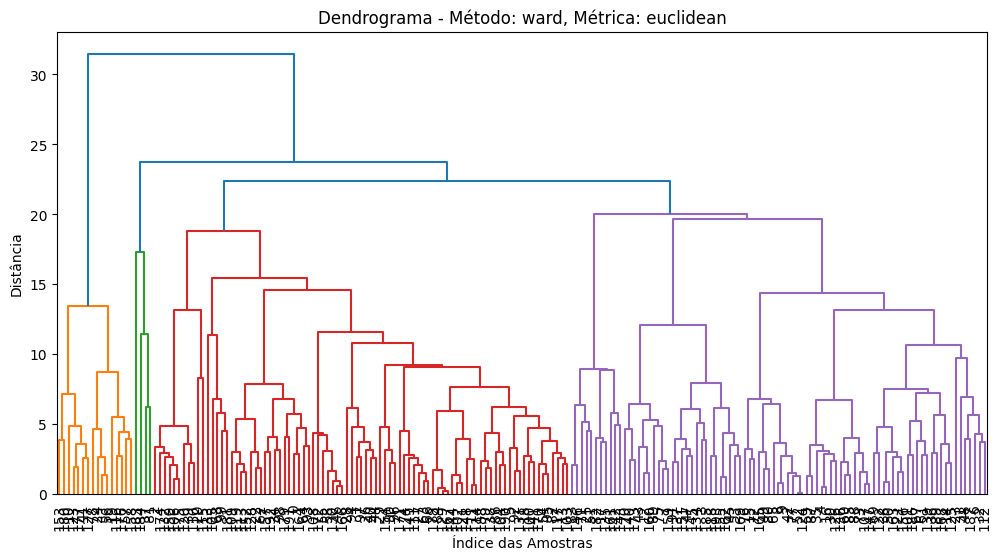

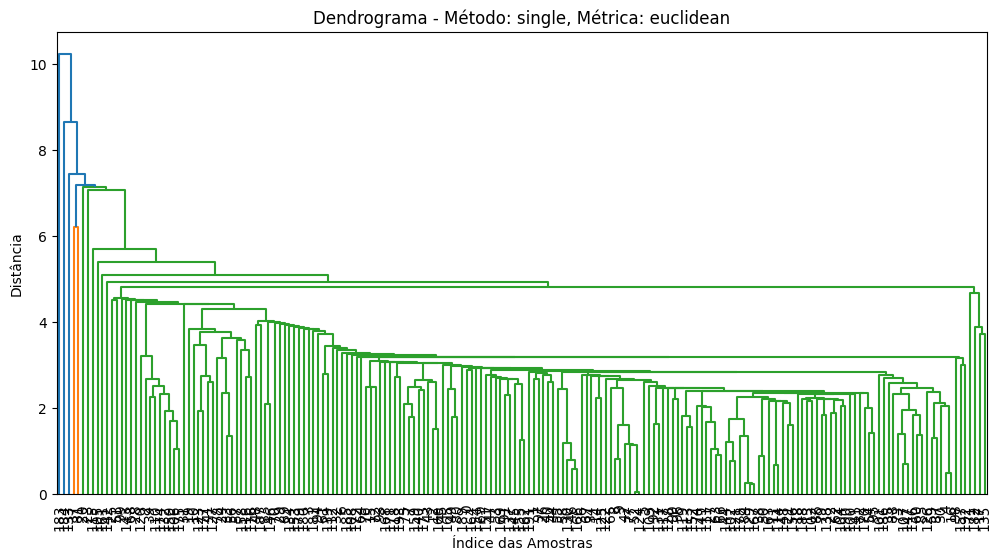

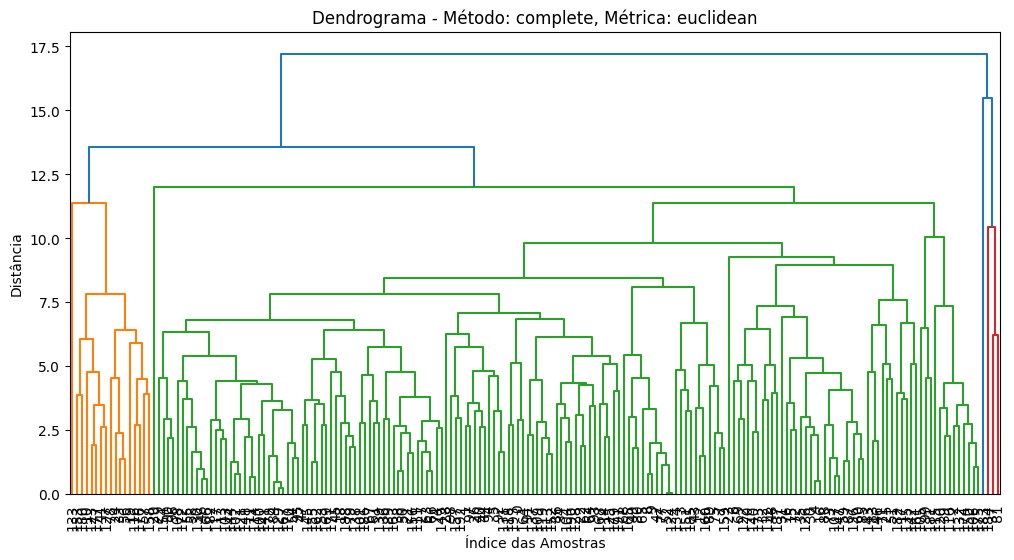

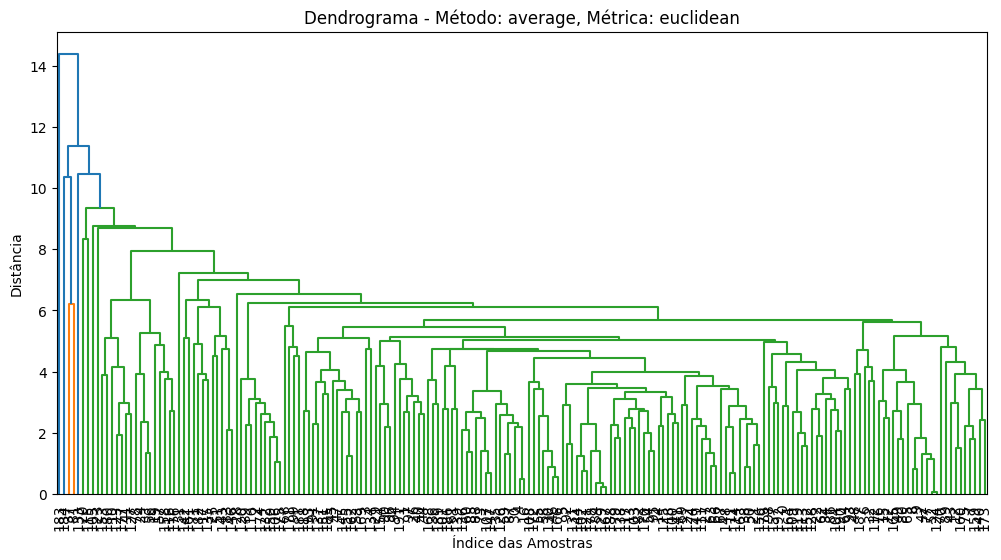

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def carregar_dataset():
    """
    Carrega o dataset de bandeiras (Flags) do UCI Machine Learning Repository.
    """
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data"
    columns = [
        "name", "landmass", "zone", "area", "population", "language", "religion",
        "bars", "stripes", "colours", "red", "green", "blue", "gold", "white", "black",
        "orange", "mainhue", "circles", "crosses", "saltires", "quarters", "sunstars",
        "crescent", "triangle", "icon", "animate", "text", "topleft", "botright"
    ]
    data = pd.read_csv(url, header=None, names=columns)

    # Excluir as colunas de cores
    colunas_de_cores = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
    data = data.drop(columns=colunas_de_cores)

    return data

def preprocessar_dados(data, categorias, normalizar=True):
    """
    Pré-processa os dados: converte colunas categóricas e normaliza colunas numéricas.

    Args:
        data (pd.DataFrame): Dataset carregado.
        categorias (list): Lista de colunas categóricas a serem convertidas.
        normalizar (bool): Indica se as colunas numéricas devem ser normalizadas.

    Returns:
        pd.DataFrame: DataFrame processado.
        np.ndarray: Dados normalizados (se solicitado).
    """
    le = LabelEncoder()
    for col in categorias:
        data[col] = le.fit_transform(data[col])

    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if normalizar:
        scaler = StandardScaler()
        normalized_data = scaler.fit_transform(data[numeric_columns])
        return data, normalized_data
    else:
        return data, data[numeric_columns].values

def ajustar_parametros_agrupamento(normalized_data, method='ward', metric='euclidean'):
    """
    Ajusta os parâmetros do agrupamento hierárquico e exibe o dendrograma.

    Args:
        normalized_data (np.ndarray): Dados normalizados.
        method (str): Método de linkage para o agrupamento hierárquico.
        metric (str): Métrica de distância para cálculo do linkage.

    Returns:
        None
    """
    try:
        # Construir a ligação (linkage)
        linkage_matrix = linkage(normalized_data, method=method, metric=metric)

        # Plotar o dendrograma
        plt.figure(figsize=(12, 6))
        dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
        plt.title(f"Dendrograma - Método: {method}, Métrica: {metric}")
        plt.xlabel("Índice das Amostras")
        plt.ylabel("Distância")
        plt.show()

    except Exception as e:
        print(f"Erro ao ajustar os parâmetros: {e}")

# Carregar o dataset
data = carregar_dataset()

# Categorias para converter
categorical_columns = ['landmass', 'zone', 'mainhue', 'topleft', 'botright']

# Pré-processar os dados
data_processed, normalized_data = preprocessar_dados(data, categorias=categorical_columns)

# Ajustar os parâmetros do agrupamento
ajustar_parametros_agrupamento(normalized_data, method='ward', metric='euclidean')
ajustar_parametros_agrupamento(normalized_data, method='single', metric='euclidean')
ajustar_parametros_agrupamento(normalized_data, method='complete', metric='euclidean')
ajustar_parametros_agrupamento(normalized_data, method='average', metric='euclidean')


Testando corte em 7...


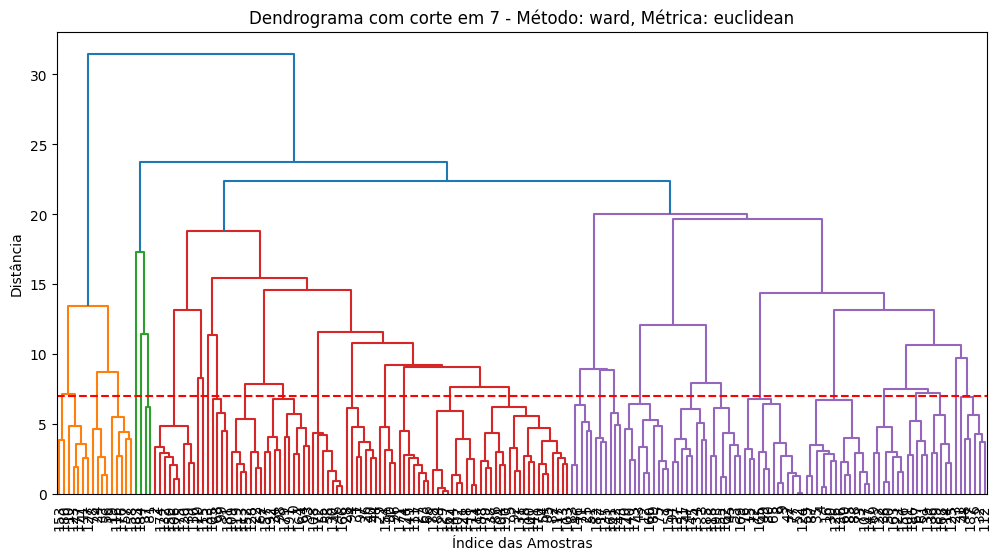

Índice de Silhueta para o número de clusters: 0.17457637835888196

Testando corte em 5...


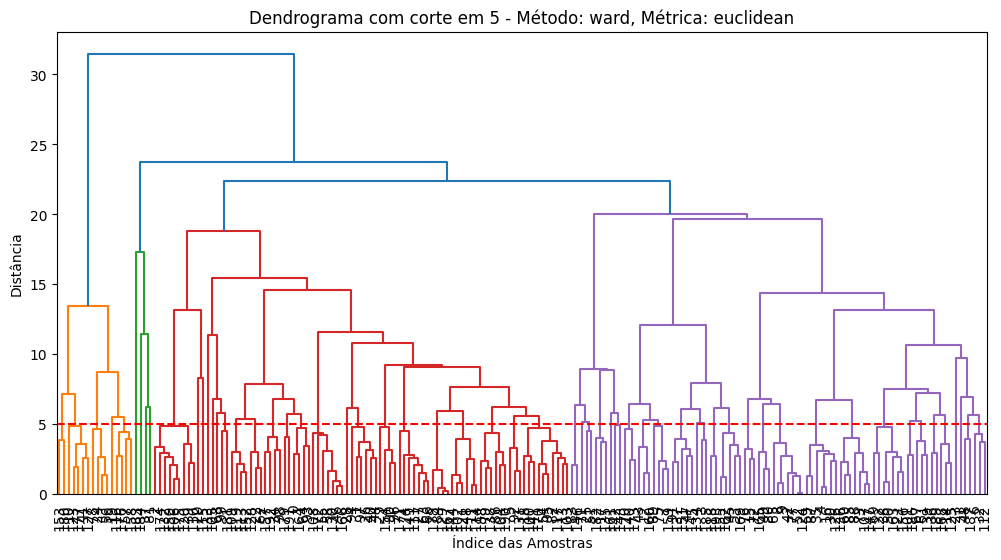

Índice de Silhueta para o número de clusters: 0.2062967298259468

Testando corte em 3...


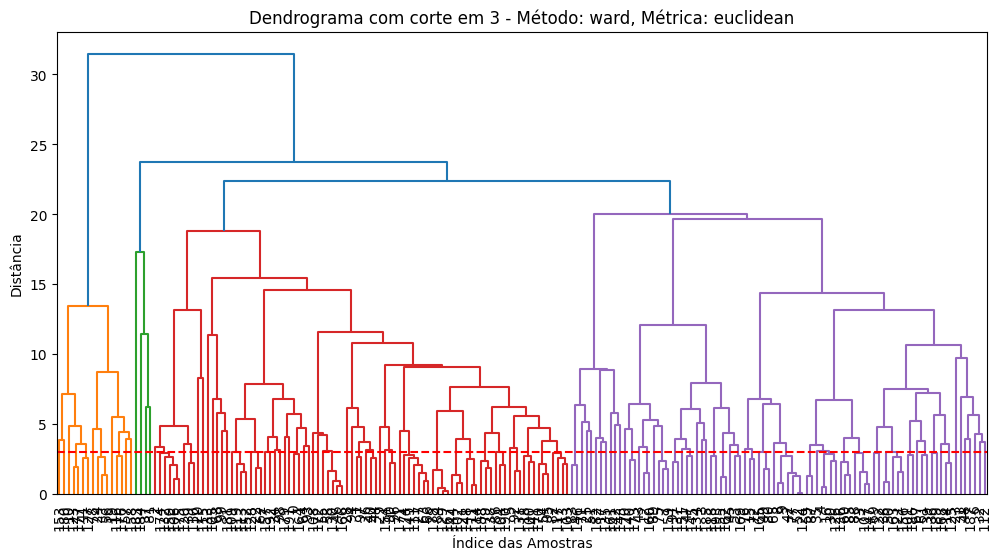

Índice de Silhueta para o número de clusters: 0.18798656816921566

Melhor número de clusters encontrado: 5 com índice de silhueta: 0.2062967298259468


In [ ]:
def testar_diferentes_cortes(normalized_data, method='ward', metric='euclidean', max_d_values=[7, 5, 3]):
    """
    Testa diferentes cortes no dendrograma e calcula o índice de silhueta para cada número de clusters.

    Args:
        normalized_data (np.ndarray): Dados normalizados.
        method (str): Método de linkage.
        metric (str): Métrica de distância.
        max_d_values (list): Lista de distâncias máximas para testar os cortes.

    Returns:
        None
    """
    melhor_silhueta = -1
    melhor_clusters = None
    melhor_d = None

    for max_d in max_d_values:
        print(f"\nTestando corte em {max_d}...")

        # Encontrar os clusters
        clusters = encontrar_numero_clusters_dendrograma(normalized_data, method=method, metric=metric, max_d=max_d)

        # Calcular o índice de silhueta
        silhueta = calcular_indice_silhueta(normalized_data, clusters)

        if silhueta > melhor_silhueta:
            melhor_silhueta = silhueta
            melhor_clusters = clusters
            melhor_d = max_d

    print(f"\nMelhor número de clusters encontrado: {melhor_d} com índice de silhueta: {melhor_silhueta}")
    return melhor_clusters, melhor_d, melhor_silhueta

# Carregar o dataset
data = carregar_dataset()

# Categorias para converter
categorical_columns = ['landmass', 'zone', 'mainhue', 'topleft', 'botright']

# Pré-processar os dados
data_processed, normalized_data = preprocessar_dados(data, categorias=categorical_columns)

# Testar diferentes cortes
melhores_clusters, melhor_d, melhor_silhueta = testar_diferentes_cortes(normalized_data, method='ward', metric='euclidean', max_d_values=[7, 5, 3])


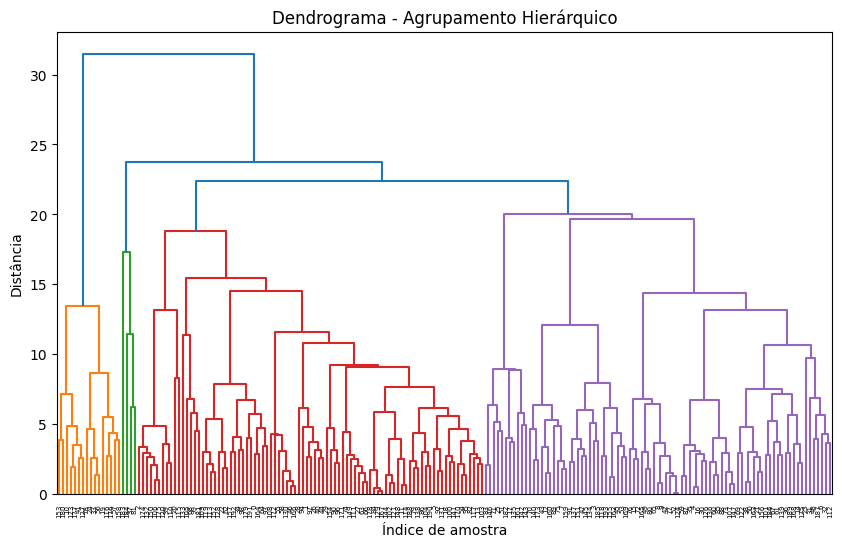

Número de clusters: 59


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Gerar o linkage matrix com o método 'ward'
linkage_matrix = sch.linkage(normalized_data, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title('Dendrograma - Agrupamento Hierárquico')
plt.xlabel('Índice de amostra')
plt.ylabel('Distância')
plt.show()

# Definir a distância de corte para o dendrograma
# Exemplo: cortar a distância no valor 5, ajustando conforme necessário
# A partir disso, contamos quantos clusters são formados
dendro_cut = 5
clusters = sch.fcluster(linkage_matrix, t=dendro_cut, criterion='distance')

# Contar o número de clusters
num_clusters = len(set(clusters))
print(f'Número de clusters: {num_clusters}')


#Determinamos a quantidade de clusters aqui cortando na altura 22 geramos 4 clusters...

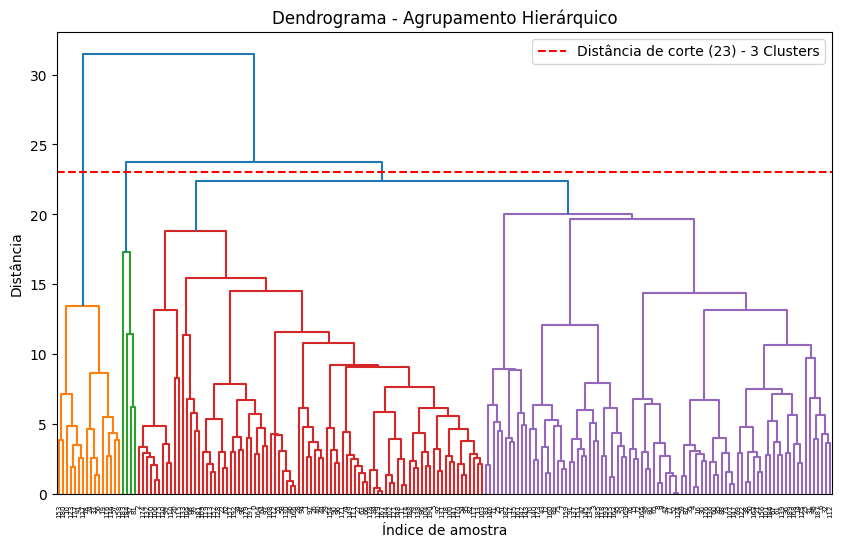

Número de clusters: 3


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Gerar o linkage matrix com o método 'ward'
linkage_matrix = sch.linkage(normalized_data, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title('Dendrograma - Agrupamento Hierárquico')
plt.xlabel('Índice de amostra')
plt.ylabel('Distância')

# Adicionar uma linha pontilhada na distância 20
plt.axhline(y=23, color='r', linestyle='--', label='Distância de corte (23) - 3 Clusters')

# Exibir a legenda
plt.legend()

plt.show()

# Definir a distância de corte para o dendrograma
dendro_cut = 23
clusters = sch.fcluster(linkage_matrix, t=dendro_cut, criterion='distance')

# Contar o número de clusters
num_clusters = len(set(clusters))
print(f'Número de clusters: {num_clusters}')

# Adicionar a coluna de cluster no DataFrame original
data['Cluster'] = clusters

# Salvar os dados com os clusters em uma planilha (CSV)
#data.to_csv('flags_with_clusters.csv', index=False)

#print("Planilha gerada com sucesso! Veja o arquivo 'flags_with_clusters.csv'.")

In [ ]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,Cluster
0,Afghanistan,4,0,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,0,4,2
1,Albania,2,0,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,5,6,2
2,Algeria,3,0,2388,20,8,2,2,0,3,...,0,1,1,0,0,0,0,3,7,2
3,American-Samoa,5,2,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,1,6,2
4,Andorra,2,0,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,1,6,2


In [ ]:
# Salva todo o DataFrame 'data' em um arquivo CSV
data.to_csv('todos_dados_data.csv', index=False)

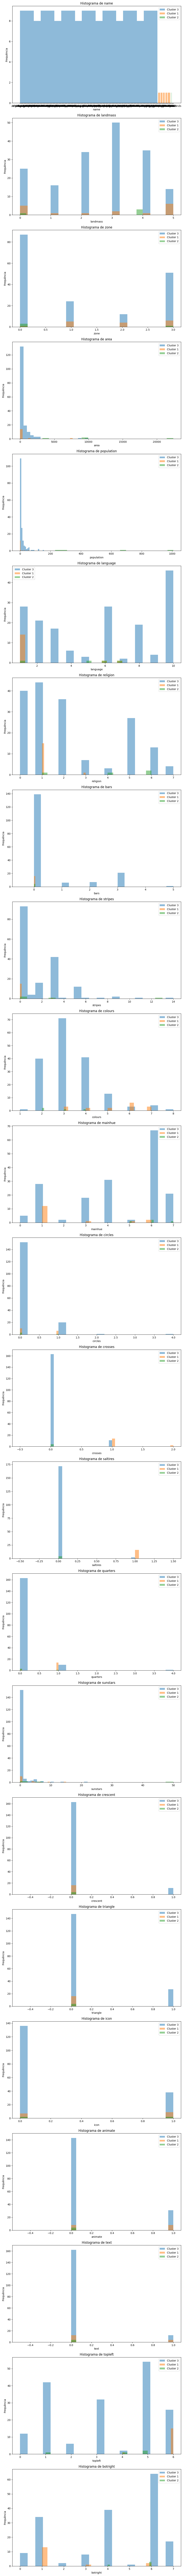

In [ ]:
import matplotlib.pyplot as plt

# Agrupar os dados pela variável 'Cluster'
# Para cada grupo (cluster), plotamos um histograma das variáveis relevantes
# Supondo que as variáveis relevantes sejam todas as colunas, exceto a coluna 'Cluster'

# Remover a coluna 'Cluster' para não incluí-la no histograma
data_without_cluster = data.drop(columns=['Cluster'])

# Determinar o número de variáveis a serem plotadas
num_vars = len(data_without_cluster.columns)

# Criar um gráfico com uma coluna e várias linhas
fig, axes = plt.subplots(num_vars, 1, figsize=(10, 6 * num_vars))

# Caso haja apenas uma variável, o 'axes' será um único objeto, então precisamos garantir que seja iterável
if num_vars == 1:
    axes = [axes]

# Plotar histogramas para cada variável, agrupando por 'Cluster'
for i, column in enumerate(data_without_cluster.columns):
    ax = axes[i]  # Selecionar o eixo correspondente para o gráfico
    for cluster in data['Cluster'].unique():
        subset = data[data['Cluster'] == cluster]
        ax.hist(subset[column], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequência')
    ax.legend()

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()


In [ ]:

from scipy.stats import f_oneway

# Selecionando apenas colunas numéricas
numerical_columns = data.select_dtypes(include=['number']).columns

# Realizando ANOVA para cada característica numérica
anova_results = {
    col: f_oneway(*[data[data['Cluster'] == c][col] for c in data['Cluster'].unique()])
    for col in numerical_columns if col != 'Cluster'
}

# Exibindo as características mais significativas
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic={result.statistic:.2f}, p-value={result.pvalue:.100f}")


landmass: F-statistic=0.21, p-value=0.8113775163466401263434590873657725751399993896484375000000000000000000000000000000000000000000000000
zone: F-statistic=2.93, p-value=0.0557350543117786784153011581111059058457612991333007812500000000000000000000000000000000000000000000
area: F-statistic=91.91, p-value=0.0000000000000000000000000001092261613215076729267643389386987371148932094796390282354805238550127762
population: F-statistic=215.58, p-value=0.0000000000000000000000000000000000000000000000001048569061621378630001841421420829847210290250077614
language: F-statistic=10.62, p-value=0.0000423622002672005063786571377182355035984073765575885772705078125000000000000000000000000000000000
religion: F-statistic=4.33, p-value=0.0144536927395636071586038085001746367197483777999877929687500000000000000000000000000000000000000000
bars: F-statistic=2.15, p-value=0.1189158112436345393625458655151305720210075378417968750000000000000000000000000000000000000000000000
stripes: F-statistic=5.26, p-valu

In [ ]:
# Importar pandas para manipulação de dados
import pandas as pd

# Supondo que 'data' seja o seu DataFrame
# Selecionar apenas as colunas numéricas
numerical_data = data.select_dtypes(include=[np.number])

# Calcular médias para cada cluster e comparar com a média geral das colunas numéricas
cluster_means = numerical_data.groupby(data['Cluster']).mean()
overall_means = numerical_data.mean()
differences = cluster_means - overall_means

# Exibir as diferenças das médias por cluster em relação à média geral
print("Diferenças das médias por cluster em relação à média geral:")
print(differences)


NameError: name 'np' is not defined

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

np.random.seed(42)
data = {
    "Método_A": np.random.normal(loc=75, scale=10, size=30),
    "Método_B": np.random.normal(loc=80, scale=15, size=30),
    "Método_C": np.random.normal(loc=70, scale=20, size=30)
}

df = pd.DataFrame(data)
f_stat, p_value = f_oneway(df['Método_A'], df['Método_B'], df['Método_C'])
means = df.mean()

print("Médias dos métodos:", means)
print("F-statistic:", f_stat)
print("P-value:", p_value)


In [ ]:
from scipy import stats

# Supondo que MSB e MSW já foram calculados, assim como dfB e dfW
F_statistic = MSB / MSW
dfB = k - 1  # k é o número de grupos
dfW = N - k  # N é o número total de observações

p_value = stats.f.sf(F_statistic, dfB, dfW)  # sf é a função de sobrevivência, que calcula 1 - cdf
